# **AI Hackathon Competetion**

### **Importing Libararies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler, FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## **Data Overview**

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Date_Time,Sex,Nation,Job,Freelance_Status,Genetic_Background,Therapy,Indoor_Days,Increasing_Stress,Habit_Changes,Psychological_History,Emotional_Fluctuations,Adaptation_Challenges,Job_Engagement,Social_Vulnerability,Psych_Evaluation,Support_Options,Body_Weight
0,8/27/2014 13:47,Male,United States,Business,No,No,No,15-30 days,Maybe,Maybe,No,Medium,Yes,Maybe,Yes,No,Yes,59.0
1,8/29/2014 14:31,Male,United States,Student,Yes,Yes,Yes,1-14 days,Maybe,Yes,No,High,No,Yes,Maybe,No,Not sure,58.0
2,8/27/2014 11:34,Male,US,Others,NaN,No,Yes,More than 2 months,No,No,No,High,No,Yes,No,No,Yes,70.0
3,8/28/2014 22:22,Male,United States,Housewife,No,No,Yes,15-30 days,Maybe,No,No,Low,Yes,Maybe,Yes,No,No,72.0
4,8/27/2014 14:53,Male,United States,Housewife,No,No,Yes,Go out Every day,Yes,Yes,No,Low,Yes,No,No,No,Yes,94.0


In [4]:
df.shape

(277746, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277746 entries, 0 to 277745
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date_Time               277746 non-null  object 
 1   Sex                     277746 non-null  object 
 2   Nation                  277745 non-null  object 
 3   Job                     277746 non-null  object 
 4   Freelance_Status        272781 non-null  object 
 5   Genetic_Background      277746 non-null  object 
 6   Therapy                 277745 non-null  object 
 7   Indoor_Days             277743 non-null  object 
 8   Increasing_Stress       277746 non-null  object 
 9   Habit_Changes           277746 non-null  object 
 10  Psychological_History   277744 non-null  object 
 11  Emotional_Fluctuations  277746 non-null  object 
 12  Adaptation_Challenges   277745 non-null  object 
 13  Job_Engagement          277742 non-null  object 
 14  Social_Vulnerability

In [6]:
df.isnull().sum()

Date_Time                    0
Sex                          0
Nation                       1
Job                          0
Freelance_Status          4965
Genetic_Background           0
Therapy                      1
Indoor_Days                  3
Increasing_Stress            0
Habit_Changes                0
Psychological_History        2
Emotional_Fluctuations       0
Adaptation_Challenges        1
Job_Engagement               4
Social_Vulnerability         0
Psych_Evaluation             2
Support_Options              4
Body_Weight                  1
dtype: int64

In [7]:
df.columns

Index(['Date_Time', 'Sex', 'Nation', 'Job', 'Freelance_Status',
       'Genetic_Background', 'Therapy', 'Indoor_Days', 'Increasing_Stress',
       'Habit_Changes', 'Psychological_History', 'Emotional_Fluctuations',
       'Adaptation_Challenges', 'Job_Engagement', 'Social_Vulnerability',
       'Psych_Evaluation', 'Support_Options', 'Body_Weight'],
      dtype='object')

### **Target Column Value Counts**

In [8]:
df['Emotional_Fluctuations'].value_counts()

Emotional_Fluctuations
Medium    96007
Low       94765
High      86974
Name: count, dtype: int64

In [9]:
df.describe

<bound method NDFrame.describe of               Date_Time     Sex         Nation        Job Freelance_Status  \
0       8/27/2014 13:47    Male  United States   Business               No   
1       8/29/2014 14:31    Male  United States    Student              Yes   
2       8/27/2014 11:34    Male             US     Others              NaN   
3       8/28/2014 22:22    Male  United States  Housewife               No   
4       8/27/2014 14:53    Male  United States  Housewife               No   
...                 ...     ...            ...        ...              ...   
277741   8/30/2014 0:09    Male  United States    Student               No   
277742  9/11/2014 17:00    Male  United States    Student               No   
277743  8/27/2014 12:05    Male  United States  Corporate               No   
277744  8/29/2014 10:38    Male  United States   Business               No   
277745  8/28/2014 16:54  Female  United States    Student               No   

       Genetic_Background The

# **Exploratory Data Analysis**

### **Separating Date and Time**

In [10]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [11]:
df['Date'] = df['Date_Time'].dt.date
df['Time'] = df['Date_Time'].dt.time

In [12]:
df.drop(columns=['Date_Time'], inplace=True)

In [13]:
df.head()

,Sex,Nation,Job,Freelance_Status,Genetic_Background,Therapy,Indoor_Days,Increasing_Stress,Habit_Changes,Psychological_History,Emotional_Fluctuations,Adaptation_Challenges,Job_Engagement,Social_Vulnerability,Psych_Evaluation,Support_Options,Body_Weight,Date,Time
0,Male,United States,Business,No,No,No,15-30 days,Maybe,Maybe,No,Medium,Yes,Maybe,Yes,No,Yes,59.0,2014-08-27,13:47:00
1,Male,United States,Student,Yes,Yes,Yes,1-14 days,Maybe,Yes,No,High,No,Yes,Maybe,No,Not sure,58.0,2014-08-29,14:31:00
2,Male,US,Others,NaN,No,Yes,More than 2 months,No,No,No,High,No,Yes,No,No,Yes,70.0,2014-08-27,11:34:00
3,Male,United States,Housewife,No,No,Yes,15-30 days,Maybe,No,No,Low,Yes,Maybe,Yes,No,No,72.0,2014-08-28,22:22:00
4,Male,United States,Housewife,No,No,Yes,Go out Every day,Yes,Yes,No,Low,Yes,No,No,No,Yes,94.0,2014-08-27,14:53:00


### **Balancing States Names in Nations**

In [14]:
df['Nation'] = df['Nation'].replace({'us': 'United States', 
                                    'uk': 'United Kingdom', 
                                    'usa': 'United States', 
                                    'united states of america': 'United States', 
                                    'england': 'United Kingdom'})


In [15]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [16]:
numeric_columns

['Body_Weight']

In [17]:
categorical_columns

['Sex',
 'Nation',
 'Job',
 'Freelance_Status',
 'Genetic_Background',
 'Therapy',
 'Indoor_Days',
 'Increasing_Stress',
 'Habit_Changes',
 'Psychological_History',
 'Emotional_Fluctuations',
 'Adaptation_Challenges',
 'Job_Engagement',
 'Social_Vulnerability',
 'Psych_Evaluation',
 'Support_Options',
 'Date',
 'Time']

### **Missing Values HeatMap**

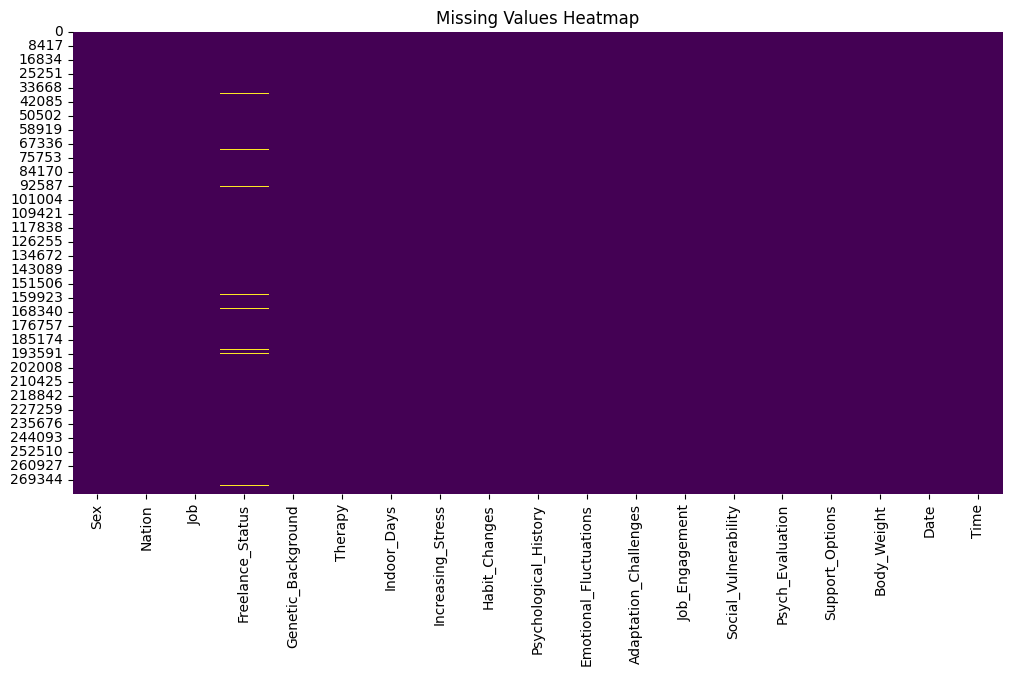

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### **Percentage of Missing Values**

In [19]:
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False)

Freelance_Status         1.787605
Job_Engagement           0.001440
Support_Options          0.001440
Indoor_Days              0.001080
Psychological_History    0.000720
Psych_Evaluation         0.000720
Nation                   0.000360
Therapy                  0.000360
Adaptation_Challenges    0.000360
Body_Weight              0.000360
dtype: float64

### **Distribution of Body Weight**

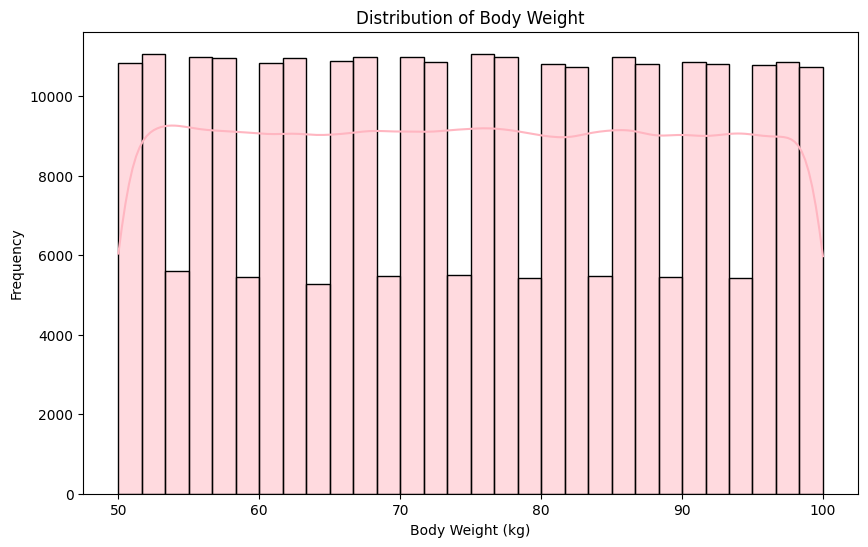

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Body_Weight'], bins=30, kde=True, color='lightpink')
plt.title('Distribution of Body Weight')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Frequency')
plt.show()

### **Distribution of Gender**

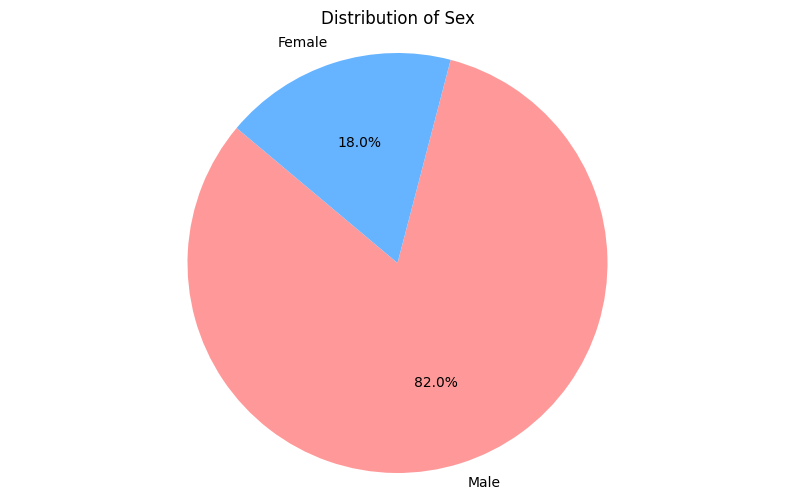

In [21]:
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Sex')
plt.axis('equal')
plt.show()

### **Relationship between Sex and Freelance Status**

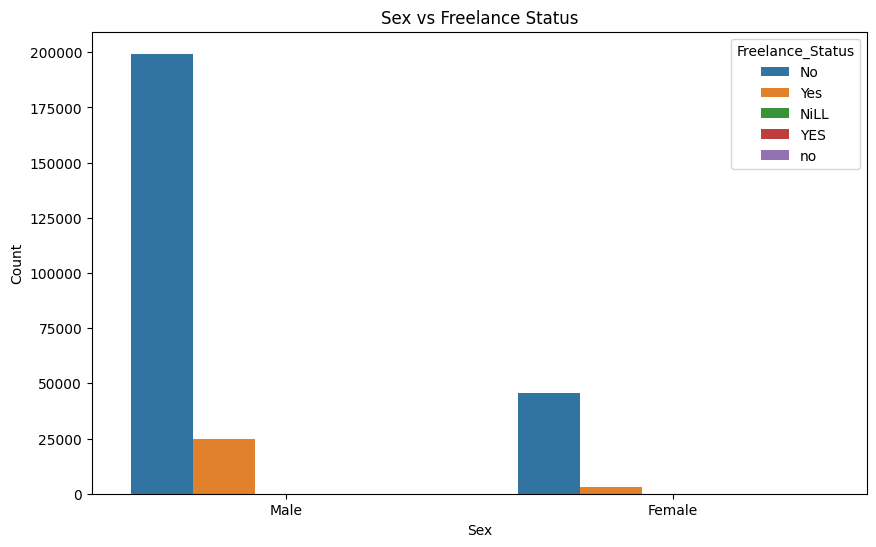

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Freelance_Status', data=df)
plt.title('Sex vs Freelance Status')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

###  **Relationship between Sex and Body Weight**

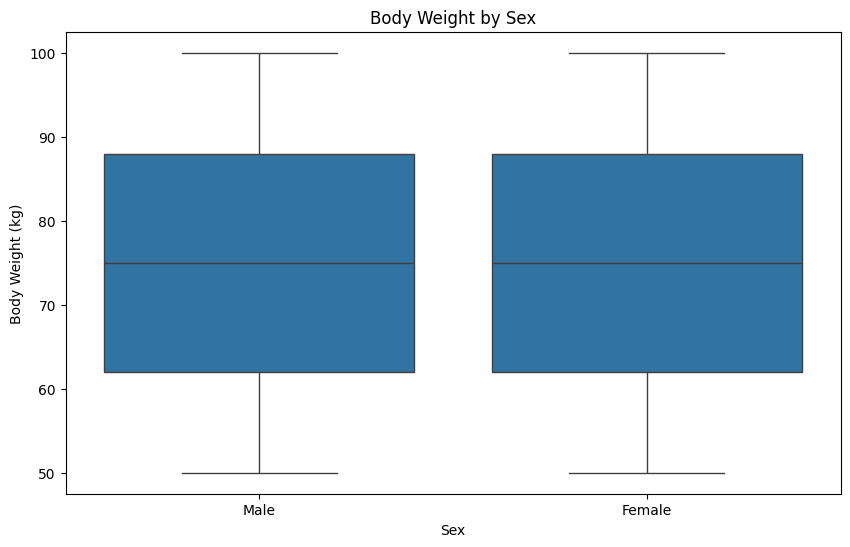

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Body_Weight', data=df)
plt.title('Body Weight by Sex')
plt.xlabel('Sex')
plt.ylabel('Body Weight (kg)')
plt.show()

### **Distribution of Job in different Nations**

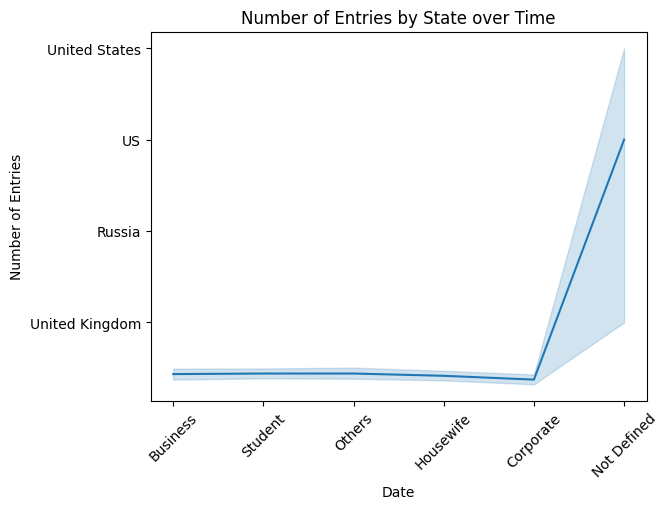

In [24]:
sns.lineplot(data=df, x='Job', y='Nation')
plt.title('Number of Entries by State over Time')
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

In [25]:
for column in df.columns:
    print(f"\nValue counts for column: {column}")
    print(df[column].value_counts())


Value counts for column: Sex
Sex
Male      227858
Female     49888
Name: count, dtype: int64

Value counts for column: Nation
Nation
United States               162815
United Kingdom               48780
Canada                       17785
Australia                     5718
Netherlands                   5594
Ireland                       5275
Germany                       4456
Sweden                        2676
India                         2633
Brazil                        2223
France                        2211
South Africa                  1894
New Zealand                   1888
Switzerland                   1486
Israel                        1483
Italy                         1478
Belgium                        780
Poland                         777
Greece                         748
Singapore                      746
Russia                         744
Denmark                        740
Thailand                       380
Portugal                       373
Croatia                   

### **Making Nominal Columns in Correct Form**

In [26]:
for col in df.columns:
    df[col] = df[col].replace(["NiLL", "Null", "none", "n/a", 'nill', 'N/A', 'NILL', 'N/a'], np.nan)
    df[col] = df[col].replace(['NO', 'no'], 'No')
    df[col] = df[col].replace(['YES', 'YEs'], 'Yes')

In [27]:
for column in df.columns:
    print(f"\nValue counts for column: {column}")
    print(df[column].value_counts())


Value counts for column: Sex
Sex
Male      227858
Female     49888
Name: count, dtype: int64

Value counts for column: Nation
Nation
United States               162815
United Kingdom               48780
Canada                       17785
Australia                     5718
Netherlands                   5594
Ireland                       5275
Germany                       4456
Sweden                        2676
India                         2633
Brazil                        2223
France                        2211
South Africa                  1894
New Zealand                   1888
Switzerland                   1486
Israel                        1483
Italy                         1478
Belgium                        780
Poland                         777
Greece                         748
Singapore                      746
Russia                         744
Denmark                        740
Thailand                       380
Portugal                       373
Croatia                   

## **Handling Outliers**

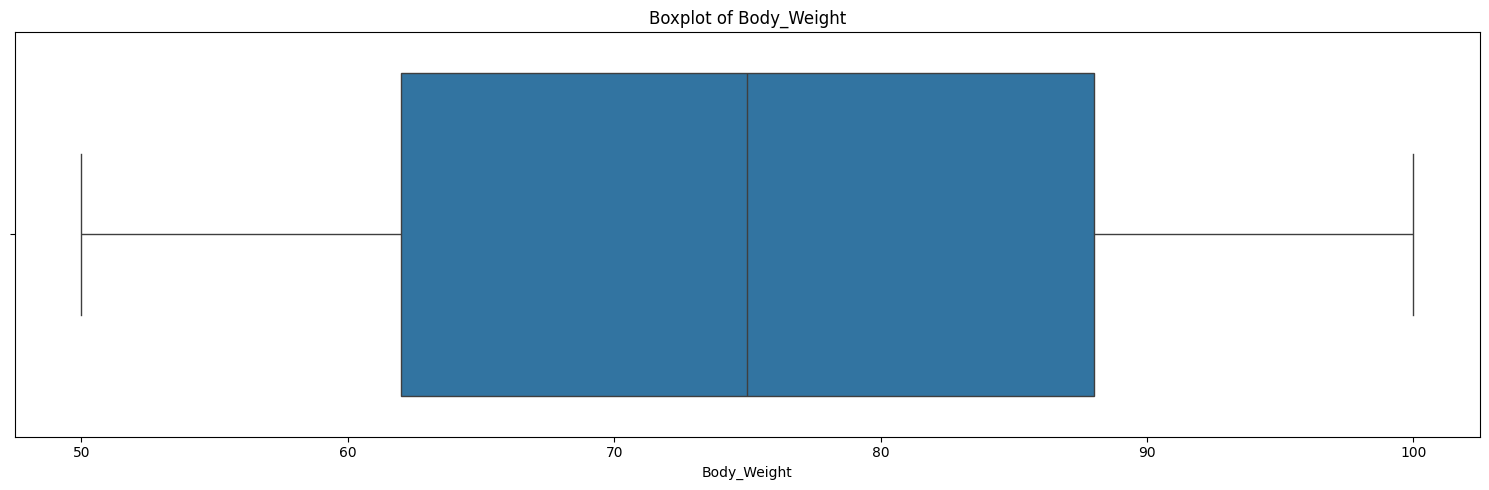

In [28]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, len(numeric_columns) * 5))

for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

# **Preprocessing of Data for Modeling**

### **Dropping Date and Time as they are irrelevant for modeling**

In [29]:
df.drop(columns=['Date','Time'], inplace=True)

In [30]:
numeric_columns

Index(['Body_Weight'], dtype='object')

In [31]:
categorical_columns = [col for col in categorical_columns if col not in ['Date', 'Time']]

In [32]:
categorical_columns

['Sex',
 'Nation',
 'Job',
 'Freelance_Status',
 'Genetic_Background',
 'Therapy',
 'Indoor_Days',
 'Increasing_Stress',
 'Habit_Changes',
 'Psychological_History',
 'Emotional_Fluctuations',
 'Adaptation_Challenges',
 'Job_Engagement',
 'Social_Vulnerability',
 'Psych_Evaluation',
 'Support_Options']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Emotional_Fluctuations']), 
                                                    df['Emotional_Fluctuations'],
                                                    test_size=0.3,
                                                    random_state=42)

In [34]:
nominal_columns = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 13]
ordinal_columns = [6, 11, 12, 14]
numeric_columns = [15]

In [35]:
handle_numerical = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

In [36]:
handle_nominal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder())
])

In [37]:
handle_ordinal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

In [38]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numeric_columns),
    ('nominal', handle_nominal, nominal_columns),
    ('ordinal', handle_ordinal, ordinal_columns)
], remainder='passthrough')

## **Decision Tree Model**

In [39]:
model_dt = DecisionTreeClassifier()

In [40]:
pipe_dt = make_pipeline(preprocessing, model_dt)

In [41]:
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  [15]),
                                                 ('nominal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder())]),
                                                  [0, 1, 2, 3, 4, 5, 7, 8, 9,
                                                   10, 13]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  [6, 11, 12, 14])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [42]:
y_pred_dt = pipe_dt.predict(X_test)

In [43]:
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

        High       0.98      0.97      0.98     26020
         Low       0.99      0.99      0.99     28602
      Medium       0.97      0.98      0.97     28702

    accuracy                           0.98     83324
   macro avg       0.98      0.98      0.98     83324
weighted avg       0.98      0.98      0.98     83324



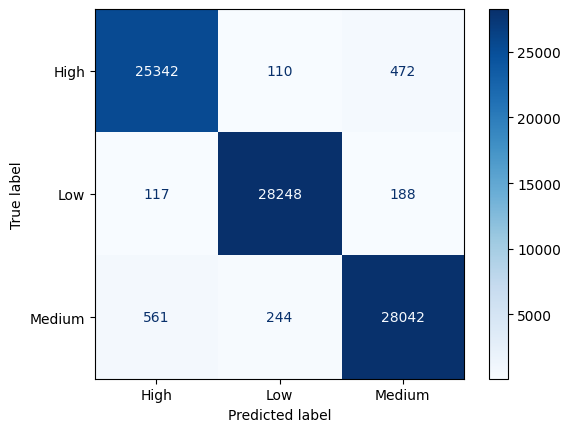

In [44]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_dt]))

cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.show()

## **Random Forest Model**

In [45]:
model_rf = RandomForestClassifier()

In [46]:
pipe_rf = make_pipeline(preprocessing, model_rf)

In [47]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  [15]),
                                                 ('nominal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder())]),
                                                  [0, 1, 2, 3, 4, 5, 7, 8, 9,
                                                   10, 13]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  [6, 11, 12, 14])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [48]:
y_pred_rf = pipe_rf.predict(X_test)

In [49]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

        High       0.97      0.97      0.97     25952
         Low       0.99      0.99      0.99     28544
      Medium       0.97      0.97      0.97     28828

    accuracy                           0.98     83324
   macro avg       0.98      0.98      0.98     83324
weighted avg       0.98      0.98      0.98     83324



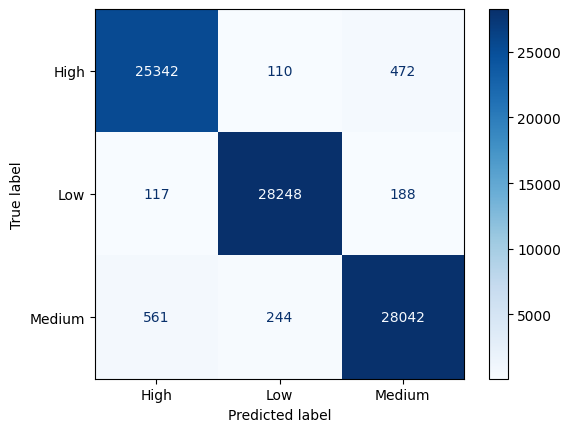

In [50]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_dt]))

cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.show()

## **Voting Classifier**

In [57]:
voting = VotingClassifier(estimators=[
    ('dt', pipe_dt),
    ('rf', pipe_rf)
], voting='soft')

In [58]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('numerical',
                                                                                Pipeline(steps=[('impute',
                                                                                                 SimpleImputer()),
                                                                                                ('scale',
                                                                                                 MinMaxScaler())]),
                                                                                [15]),
                                                                               ('nominal',
                                                                                Pipeline(steps=[('impute',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('encode',
                                                                                                 OneHotEncoder())]),
                                                                                [0,
                                                                                 1,
                                                                                 2,
                                                                                 3,
                                                                                 4,
                                                                                 5,
                                                                                 7,
                                                                                 8,
                                                                                 9,
                                                                                 10,
                                                                                 13])...
                                                                                                 MinMaxScaler())]),
                                                                                [15]),
                                                                               ('nominal',
                                                                                Pipeline(steps=[('impute',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('encode',
                                                                                                 OneHotEncoder())]),
                                                                                [0,
                                                                                 1,
                                                                                 2,
                                                                                 3,
                                                                                 4,
                                                                                 5,
                                                                                 7,
                                                                                 8,
                                                                                 9,
                                                                                 10,
                                                                                 13]),

In [59]:
y_pred_voting = voting.predict(X_test)

In [60]:
print(classification_report(y_pred_voting, y_test))

              precision    recall  f1-score   support

        High       0.98      0.98      0.98     25934
         Low       0.99      0.99      0.99     28586
      Medium       0.97      0.98      0.97     28804

    accuracy                           0.98     83324
   macro avg       0.98      0.98      0.98     83324
weighted avg       0.98      0.98      0.98     83324



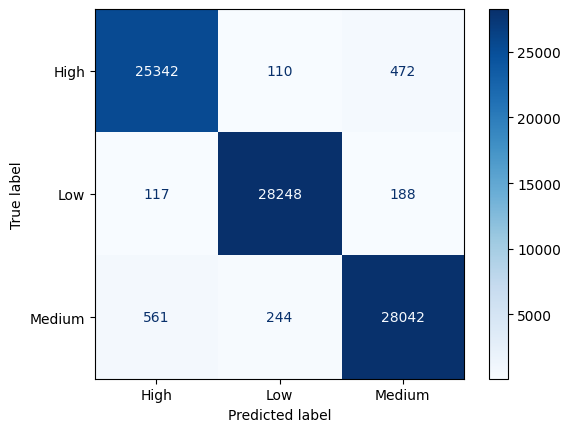

In [61]:
unique_classes = np.unique(np.concatenate([y_test, y_pred_dt]))

cm = confusion_matrix(y_test, y_pred_dt, labels=unique_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.show()

## **Submission**

In [62]:
test = pd.read_csv('test.csv')
test.drop(columns=['ID', 'Date_Time'], inplace=True)
test.head()

,Sex,Nation,Job,Freelance_Status,Genetic_Background,Therapy,Indoor_Days,Increasing_Stress,Habit_Changes,Psychological_History,Adaptation_Challenges,Job_Engagement,Social_Vulnerability,Psych_Evaluation,Support_Options,Body_Weight
0,Female,Canada,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,No,No,Yes,No,Yes,74
1,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,No,No,Yes,No,Yes,71
2,Female,United States,Corporate,Yes,Yes,Yes,1-14 days,Yes,No,Yes,No,No,Yes,No,No,64
3,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,No,No,Yes,No,Yes,58
4,Female,Canada,Corporate,Yes,Yes,Yes,1-14 days,Yes,No,Yes,No,No,Yes,No,Yes,89


In [63]:
prediction = voting.predict(test)

In [64]:
predict = pd.DataFrame(prediction, columns=['Emotional_Fluctuations'])

In [65]:
predict['ID'] = range(1, len(predict) + 1)

In [66]:
predict = predict[['ID', 'Emotional_Fluctuations']]

In [67]:
predict.to_csv('Output.csv', index=False)